# CA2 - Supervised machine learning classification pipeline - applied to medical data

### Important information

- Do __not__ use scikit-learn (`sklearn`) or any other high-level machine learning library for this CA
- Explain your code and reasoning in markdown cells or code comments
- Label all graphs and charts if applicable
- If you use code from the internet, make sure to reference it and explain it in your own words
- If you use additional function arguments, make sure to explain them in your own words
- Use the classes `Perceptron`, `Adaline` and `Logistic Regression` from the library `mlxtend` as classifiers (`from mlxtend.classifier import Perceptron, Adaline, LogisticRegression`). _Always_ use the argument `minibatches=1` when instantiating an `Adaline` or `LogisticRegression` object. This makes the model use the gradient descent algorithm for training. Always use the `random_seed=42` argument when instantiating the classifiers. This will make your results reproducible.
- You can use any plotting library you want (e.g. `matplotlib`, `seaborn`, `plotly`, etc.)
- Use explanatory variable names (e.g. `X_train` and `X_train_scaled` for the training data before and after scaling, respectively)
- The dataset is provided in the file `fetal_health.csv` in the `assets` folder

### Additional clues

- Use the `pandas` library for initial data inspection and preprocessing
- Before training the classifiers, convert the data to raw `numpy` arrays
- For Part IV, you are aiming to create a plot that looks similar to this:
<img src="./assets/example_output.png" width="300">

### Additional information

- Feel free to create additional code or markdown cells if you think it will help you explain your reasoning or structure your code (you don't have to).


## Part I: Data loading and data exploration

### Import necessary libraries/modules:

In [45]:
# Insert your code below
# ======================
from mlxtend.classifier import Perceptron, Adaline, LogisticRegression
import pandas as pd
import seaborn as sns 
sns.set_style('darkgrid')
import numpy as np
import matplotlib.pyplot as plt

### Loading and exploring data

1. Load the dataset `fetal_health.csv` with `pandas`. Use the first column as the row index.
2. Check for missing data, report on your finding and remove samples with missing data, if you find any.
3. Display the raw data with appropriate plots/outputs and inspect it. Describe the distributions of the values of feature `"baseline value"`, `"accelerations"`, and the target variable `"fetal_health"`.
4. Will it be beneficial to scale the data? Why or why not?
5. Is the data linearly separable using a combination of any two pairs of features? Can we expect an accuracy close to 100% from a linear classifier?

In [46]:
# Insert your code below
# ======================
data = pd.read_csv("assets/fetal_health.csv", index_col=0)
data.head(25)

,baseline value,accelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_mean,histogram_variance,fetal_health
1584,132.0,0.000,0.0,35.0,1.3,0.0,135.0,9.0,0
942,136.0,0.003,0.0,54.0,0.7,15.0,141.0,8.0,0
1376,121.0,0.006,0.0,24.0,1.7,0.0,121.0,25.0,0
169,116.0,0.001,0.0,46.0,0.7,39.0,120.0,1.0,0
1293,115.0,0.006,0.0,19.0,1.7,0.0,121.0,9.0,0
1271,119.0,0.000,0.0,27.0,1.2,0.0,120.0,1.0,0
1242,115.0,0.000,0.0,20.0,1.7,0.0,118.0,4.0,0
908,146.0,0.008,0.0,28.0,1.3,1.0,154.0,6.0,0
934,126.0,0.003,0.0,25.0,1.8,0.0,130.0,12.0,0
1482,132.0,0.000,0.0,47.0,0.7,1.0,134.0,2.0,0


In [47]:
# Checking for null values and summing up the total null values for each column
missing_values = data.isnull().sum()
missing_values
# The results from the isnull.sum tell us that there are no missing samples in the dataset

baseline value                                            0
accelerations                                             0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
histogram_mean                                            0
histogram_variance                                        0
fetal_health                                              0
dtype: int64

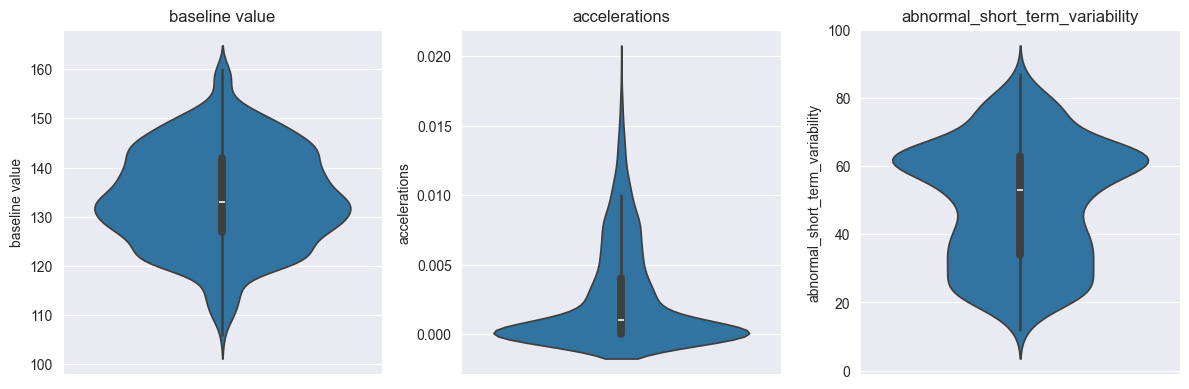

In [48]:
# Start with violin plots for baseline value, abnormal short term variability and accelerations

fig, axis = plt.subplots(1, 3, figsize=(12, 4))

for idx, var in enumerate(["baseline value", "accelerations", "abnormal_short_term_variability"]):
    sns.violinplot(data=data, y=var, ax=axis[idx])
    axis[idx].set_title(var)
    
fig.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

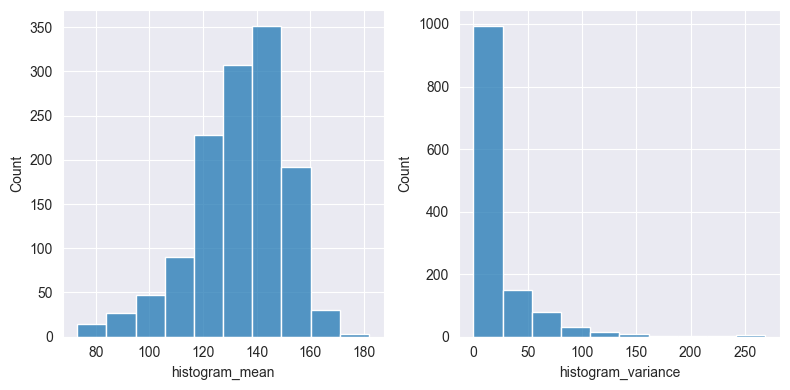

In [49]:
# Histogram for histogram mean and histogram variance med 10 bins

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

for idx, var in enumerate(["histogram_mean", "histogram_variance"]):
    sns.histplot(data=data[var], ax=axes[idx], bins=10)
    
fig.tight_layout()
plt.show

[]

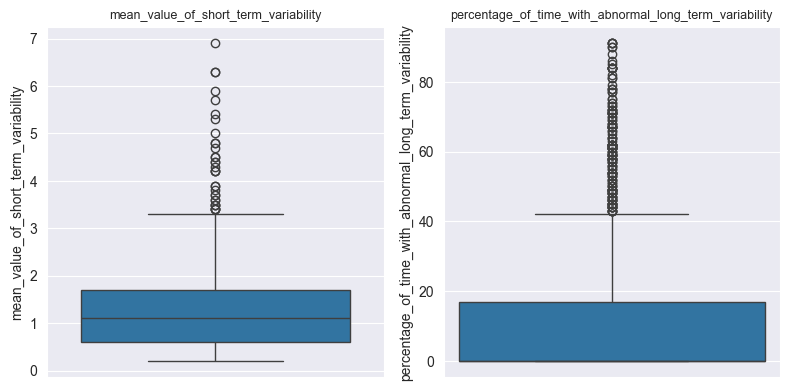

In [50]:
# boxplot for mean value of short term variability og percentage of time with abnormal long term variability

fig, axis = plt.subplots(1, 2, figsize=(8, 4))

for idx, var in enumerate(["mean_value_of_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability"]):
    sns.boxplot(data=data[var], ax=axis[idx])
    axis[idx].set_title(var, fontsize=9)

fig.tight_layout()
plt.plot()

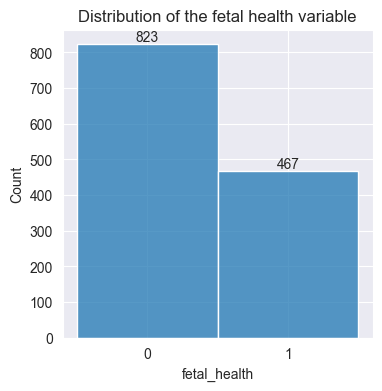

In [51]:
# Histogram for å vise antallet i fetal health variable 
fig, axes = plt.subplots(1,1,figsize=(4,4))
sns.histplot(data=data, x="fetal_health", ax=axes, discrete=True)
axes.set_title("Distribution of the fetal health variable")

for p in axes.patches:
    height = p.get_height()
    position_x = p.get_x() + p.get_width() / 2
    axes.text(position_x, height, f'{height}', ha="center", va="bottom", fontsize=10)

plt.xticks([0, 1])
plt.show()

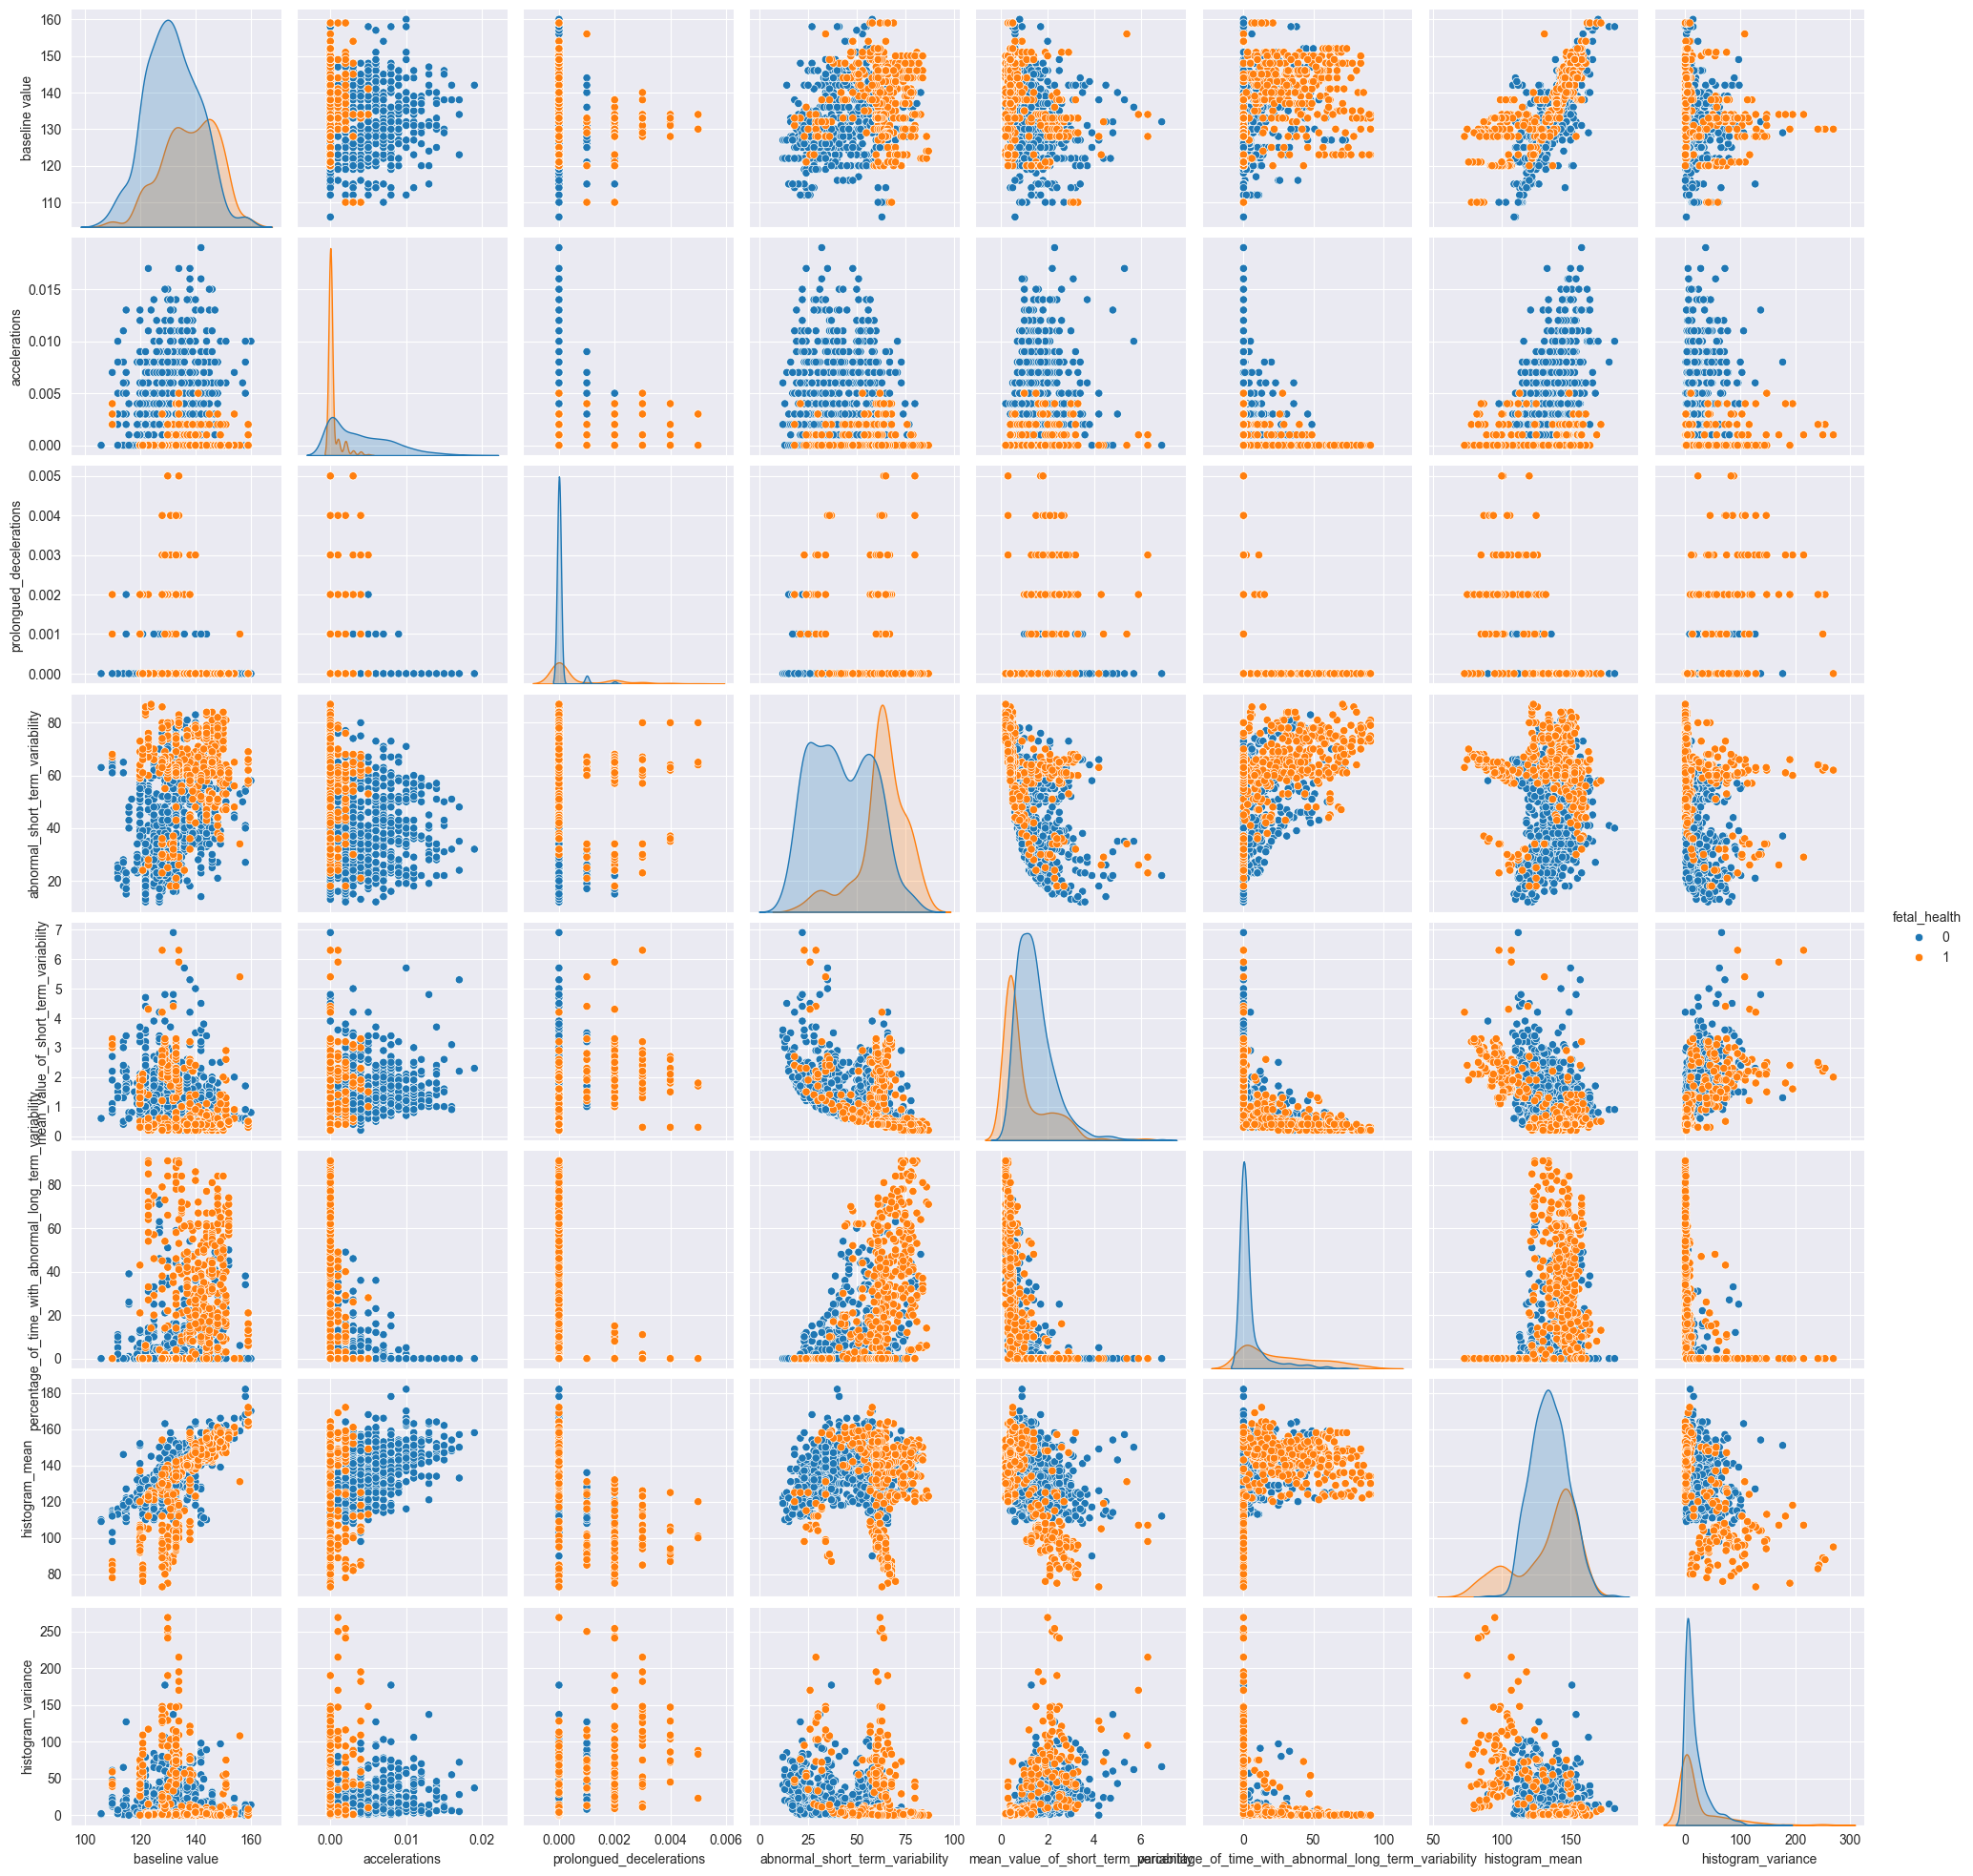

In [52]:
# Lage et pairplot av alle variablene som er i datasettet for å bruke videre for å se på om dataen er lineær separabel
sns.pairplot(data=data, hue="fetal_health")

## Description of the distributions


* `"baseline value"`: Looks to be almost following a normal distribution, shown in both the pairplot and violin plot
* `"accelerations"`: Looks heavily skewed to one side of the distribution, shown both in the pairplot and violin plot of accelerations
* `"fetal_health"`: Only two choices, but a higher count for the value 0 than one, shown in the distribution of fetal health variable plot

## Scaling or not
It would be beneficial to scale the data in this dataset. Some reasons for this are
1. There are large differences in magnitudes in the data, meaning that some features have very high values, while some have very low which significantly impacts the efficiency of a machine learning model.
2. Skewed distributions like `"histogram_variance"` and others can be scaled to be more central making them more uniform and easier to work with when it comes to using it with other variables
3. Improvement of the model convergence



## Part II: Train/Test Split

Divide your dataset into training and testing subsets. Follow these steps to create the split:

1. **Divide the dataset into two data sets, each data set only contains samples of either class 0 or class 1:**
- Create a DataFrame `df_0` containing all data with `"fetal_health"` equal to 0.
- Create a DataFrame `df_1` containing all data with `"fetal_health"` equal to 1.

2. **Split into training and test set by randomly sampling entries from the data frames:**
- Create a DataFrame `df_0_train` containing by sampling `75%` of the entries from `df_0` (use the `sample` method of the data frame, fix the `random_state` to `42`).
- Create a DataFrame `df_1_train` using the same approach with `df_1`.
- Create a DataFrame `df_0_test` containing the remaining entries of `df_0` (use `df_0.drop(df_0_train.index)` to drop all entries except the previously extracted ones).
- Create a DataFrame `df_1_test` using the same approach with `df_1`.

3. **Merge the datasets split by classes back together:**
- Create a DataFrame `df_train` containing all entries from `df_0_train` and `df_1_train`. (Hint: use the `concat` method you know from CA1)
- Create a DataFrame `df_test` containing all entries from the two test sets.

4. **Create the following data frames from these splits:**
- `X_train`: Contains all columns of `df_train` except for the target feature `"fetal_health"`
- `X_test`: Contains all columns of `df_test` except for the target feature `"fetal_health"`
- `y_train`: Contains only the target feature `"fetal_health"` for all samples in the training set
- `y_test`: Contains only the target feature `"fetal_health"` for all samples in the test set

5. **Check that your sets have the expected sizes/shape by printing number of rows and colums ("shape") of the data sets.**
- (Sanity check: there should be 8 features, almost 1000 samples in the training set and slightly more than 300 samples in the test set.)


6. **Explain the purpose of this slightly complicated procedure. Why did we first split into the two classes? Why did we then split into a training and a testing set?**


7. **What is the share (in percent) of samples with class 0 label in test and training set, and in the intial data set?**



In [53]:
# Insert your code below
# ======================

#Creating two datasets for fetal health 0 and 1
df_0 = data[data["fetal_health"] == 0]
df_1 = data[data["fetal_health"] == 1]

#Creating a training set for the data frames, using random sampling
df_0_train = df_0.sample(frac=0.75, random_state=42)
df_1_train = df_1.sample(frac=0.75, random_state=42)

#Creating a test set containing the remaining entries of df_0 and df_1
df_0_test = df_0.drop(df_0_train.index)
df_1_test = df_1.drop(df_1_train.index)

#Creating a dataframe for training and testing, containing data for fetal health 0 and 1
df_train = pd.concat([df_0_train, df_1_train])
df_test = pd.concat([df_0_test, df_1_test])

#Splitting the data into X and y where X contains all columns except fetal_health and y contains only fetal_health 
X_train = df_train.drop(columns="fetal_health")
X_test = df_test.drop(columns="fetal_health")

y_train = df_train["fetal_health"]
y_test = df_test["fetal_health"]

#Checking if the sets has expected size/shape
print("Shape of datasets:\n", X_train.shape, X_test.shape, "\n")

#Checking percentage of fetal health 0 in test set, training set and initial dataset
print("Test set:\n", df_test["fetal_health"].value_counts(normalize=True) * 100, "\n")
print("Training set:\n", df_train["fetal_health"].value_counts(normalize=True) * 100, "\n")
print("Inintal set:\n", data["fetal_health"].value_counts(normalize=True) * 100)

Shape of datasets:
 (967, 8) (323, 8) 

Test set:
 fetal_health
0    63.77709
1    36.22291
Name: proportion, dtype: float64 

Training set:
 fetal_health
0    63.805584
1    36.194416
Name: proportion, dtype: float64 

Inintal set:
 fetal_health
0    63.79845
1    36.20155
Name: proportion, dtype: float64


## Purpose of procedure
### Why did we split into the two classes?
* We did this to separate the datasets so that we have one dataset where fetal health is 0 and one where fetal health is 1. The benefit of doing this is to see what trends may lead to the two outcomes.

### Why did we then split into a training and a testing set?
* The training set will be used to train the data and see different trends, while the test set will be used to see if these trends actually are true. 

### Convert data to numpy arrays and shuffle the training data

Many machine learning models (including those you will work with later in the assignment) will not accept DataFrames as input. Instead, they will only work if you pass numpy arrays containing the data.
Here, we convert the DataFrames `X_train`, `X_test`, `y_train`, and `y_test` to numpy arrays `X_train`, `X_test`, `y_train`, and `y_test`.

Moreover we shuffle the training data. This is important because the training data is currently ordered by class. In Part IV, we use the first n samples from the training set to train the classifiers. If we did not shuffle the data, the classifiers would only be trained on samples of class 0.

Nothing to be done here, just execute the cell.

In [ ]:
# convert to numpy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# shuffle training data
np.random.seed(42) # for reproducibility
shuffle_index = np.random.permutation(len(X_train)) # generate random indices
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index] # shuffle data by applying reordering with the random indices



(967,)

## Part III: Scaling the data

1. Standardize the training _and_ test data so that each feature has a mean of 0 and a standard deviation of 1.
2. Check that the scaling was successful
    - by printing the mean and standard deviation of each feature in the scaled training set
    - by putting the scaled training set into a DataFrame and make a violin plot of the data

__Hint:__ use the `axis` argument to calculate mean and standard deviation column-wise.

__Important:__ Avoid data leakage!

__More hints:__

1. For each column, subtract the mean $(\mu)$ of each column from each value in the column
2. Divide the result by the standard deviation $(\sigma)$ of the column

(You saw how to do both operations in the lecture. If you don't remember, you can look it up in Canvas files.)

Mathematically (in case this is useful for you), this transformation can be represented for each column as follows:

$$ X_\text{scaled} = \frac{(X - \mu)}{\sigma} $$

where:
- $(X_\text{scaled})$ are the new, transformed column values (a column-vector)
- $(X)$ is the original values
- $(\mu)$ is the mean of the column
- $(\sigma)$ is the standard deviation of the column



In [65]:
# Insert your code below
# ======================

X_train_mean = np.mean(df_train, axis=0)
X_train_std = np.std(df_train, axis=0, ddof=1)
X_train_scaled = (df_train - X_train_mean) / X_train_std

print(np.mean(X_train_scaled.to_numpy(), axis=0))
print(np.std(X_train_scaled.to_numpy(), axis=0))


X_test_mean = np.mean(df_train, axis=0)
X_test_std = np.std(df_train, axis=0, ddof=1)
X_test_scaled = (df_test - X_test_mean) / X_test_std
    
print(np.mean(X_test_scaled.to_numpy(), axis=0))
print(np.std(X_test_scaled.to_numpy(), axis=0))

# Data leakage occurs when information from the test set is used during training.
# Therefore we only apply mean and standard deviation from the training dataset to scale both datasets, to keep test data statistics unseen

[-1.02870717e-16  0.00000000e+00  0.00000000e+00  2.35133067e-16
 -7.34790833e-17 -2.93916333e-17 -3.30655875e-16 -2.20437250e-17
 -5.87832667e-17]
[0.9994828 0.9994828 0.9994828 0.9994828 0.9994828 0.9994828 0.9994828
 0.9994828 0.9994828]
[-0.02278484  0.10517582  0.06832144  0.00942429  0.018526   -0.05581759
  0.0135212  -0.02609709  0.00059263]
[0.94550854 1.08350973 1.16912371 0.96831631 1.02350704 0.8873325
 0.97185078 0.90821045 0.99965286]


## Part IV: Training and evaluation with different dataset sizes and training times

Often, a larger dataset size will yield better model performance. (As we will learn later, this usually prevents overfitting and increases the generalization capability of the trained model.)
However, collecting data is usually rather expensive.

In this part of the exercise, you will investigate

- how the model performance changes with varying dataset size
- how the model performance changes with varying numbers of epochs/iterations of the optimizer/solver (increasing training time).

For this task (Part IV), use the `Adaline`, `Perceptron`, and `LogisticRegression` classifier from the `mlxtend` library. All use the gradient descent (GD) algorithm for training.

__Important__: Use a learning rate of `1e-4` (`0.0001`) for all classifiers, and use the argument `minibatches=1` when initializing `Adaline` and `LogisticRegression` classifier (this will make sure it uses GD). For all three classifiers, pass `random_seed=42` when initializing the classifier to ensure reproducibility of the results.

### Model training

Train the model models using progressively larger subsets of your dataset, specifically: first 50 rows, first 100 rows, first 150 rows, ..., first 650 rows, first 700 rows (in total $14$ different variants).

For each number of rows train the model with progressively larger number of epochs: 2, 7, 12, 17, ..., 87, 92, 97 (in total $20$ different model variants).

The resulting $14 \times 20 = 280$ models obtained from the different combinations of subsets and number of epochs. An output of the training process could look like this:

```
Model (1) Train a model with first 50 rows of data for 2 epochs
Model (2) Train a model with first 50 rows of data for 7 epochs
Model (3) Train a model with first 50 rows of data for 12 epochs
...
Model (21) Train a model with first 100 rows of data for 2 epochs
Model (22) Train a model with first 100 rows of data for 7 epochs
...
Model (279) Train a model with first 700 rows of data for 92 epochs
Model (280) Train a model with first 700 rows of data for 97 epochs
```

### Model evaluation

For each of the $280$ models, calculate the __accuracy on the test set__ (do __not__ use the score method but compute accuracy yourself).
Store the results in the provided 2D numpy array (it has $14$ rows and $20$ columns).
The rows of the array correspond to the different dataset sizes, and the columns correspond to the different numbers of epochs.

### Tasks
1. Train the $280$ Adaline classifiers as mentioned above and calculate the accuracy for each of the $280$ variants.
2. Generalize your code so that is doing the same procedure for all three classifiers: `Perceptron`, `Adaline`, and `LogisticRegression` after each other. Store the result for all classifiers. You can for example use an array of shape $3\times14\times20$ to store the accuracies of the three classifiers.

Note that executing the cells will take some time (but on most systems it should not be more than 5 minutes).

In [66]:
# Train and evaluate all model variants
# Insert your code below
# ======================

model_types = ["Perceptron", "Adaline", "LogisticRegression"]
row_limit_start = 50
accuracy_matrix = np.zeros((3, 14, 20))

for model_idx, model_type in enumerate(model_types):
    row_limit = row_limit_start
    model_num = 1
    
    for i in range(14):
        epoch_limit = 2

        for j in range(20):
            if model_type == "Perceptron":
                model = Perceptron(epochs=epoch_limit, eta=0.0001, random_seed=42)
            elif model_type == "Adaline":
                model = Adaline(epochs=epoch_limit, eta=0.0001, random_seed=42, minibatches=1)
            elif model_type == "LogisticRegression":
                model = LogisticRegression(epochs=epoch_limit, eta=0.0001, random_seed=42, minibatches=1)
            else:
                print("Model types not valid! try again...")
                
            model.fit(X_train_scaled.to_numpy()[:row_limit], y_train[:row_limit])
            y_pred = model.predict(X_test_scaled.to_numpy())
            accuracy = np.mean(y_pred == y_test)
            
            accuracy_matrix[model_idx, i, j] = accuracy
            
            print(f"Model ({model_num}) - {model_type.capitalize()} | Train with {row_limit} rows for {epoch_limit} epochs - Accuracy: {accuracy:.2f}")
            
            epoch_limit += 5
            model_num += 1  

        row_limit += 50
        
print("\nFinal Accuracy Matrix (3x14x20):")
print(accuracy_matrix)       

Model (1) - Perceptron | Train with 50 rows for 2 epochs - Accuracy: 0.69
Model (2) - Perceptron | Train with 50 rows for 7 epochs - Accuracy: 0.51
Model (3) - Perceptron | Train with 50 rows for 12 epochs - Accuracy: 0.39
Model (4) - Perceptron | Train with 50 rows for 17 epochs - Accuracy: 0.49
Model (5) - Perceptron | Train with 50 rows for 22 epochs - Accuracy: 0.45
Model (6) - Perceptron | Train with 50 rows for 27 epochs - Accuracy: 0.33
Model (7) - Perceptron | Train with 50 rows for 32 epochs - Accuracy: 0.43
Model (8) - Perceptron | Train with 50 rows for 37 epochs - Accuracy: 0.42
Model (9) - Perceptron | Train with 50 rows for 42 epochs - Accuracy: 0.43
Model (10) - Perceptron | Train with 50 rows for 47 epochs - Accuracy: 0.25
Model (11) - Perceptron | Train with 50 rows for 52 epochs - Accuracy: 0.39
Model (12) - Perceptron | Train with 50 rows for 57 epochs - Accuracy: 0.48
Model (13) - Perceptron | Train with 50 rows for 62 epochs - Accuracy: 0.37
Model (14) - Perceptron

### Performance visualization

Plot the performance measure for all classifiers (accuracy on the test set; use the result array from above) of all the $280$ variants for each classifier in a total of three heatmaps using, for example `seaborn` or `matplotlib` directly.

The color should represent the accuracy on the test set, and the x and y axes should represent the number of epochs and the dataset size, respectively.
Which one is x and which one is y is up to you to decide. Look in the example output at the top of the assignment for inspiration for how the plot could look like and how it could be labeled nicely. (But use the correct numbers corresponding to your dataset sizes and number of epochs.)

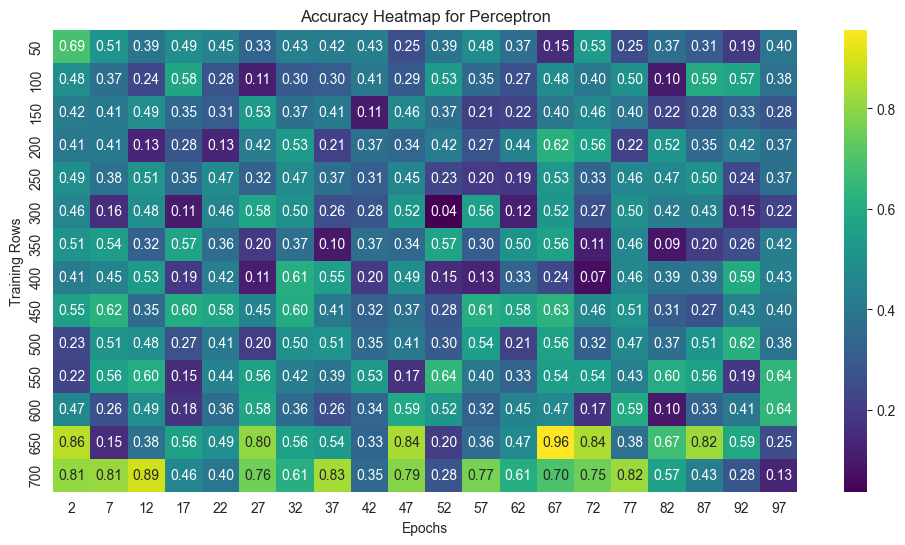

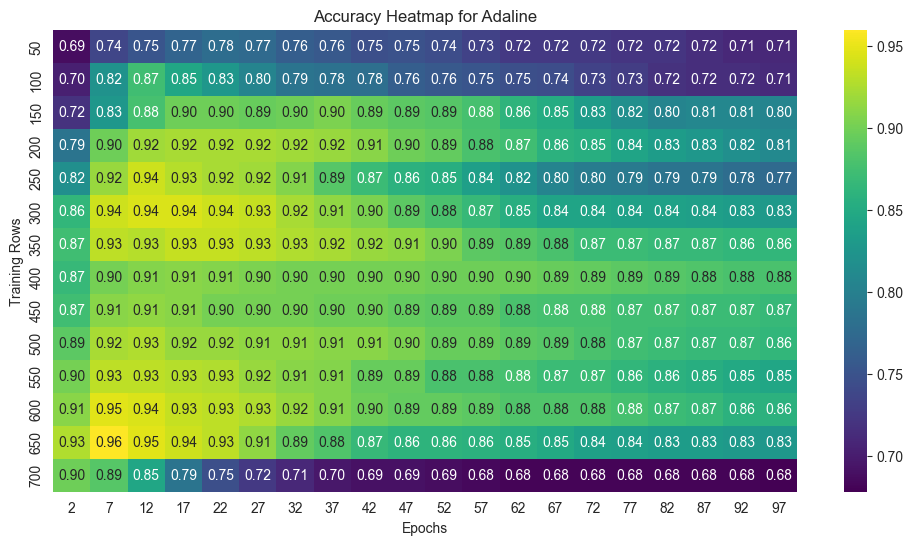

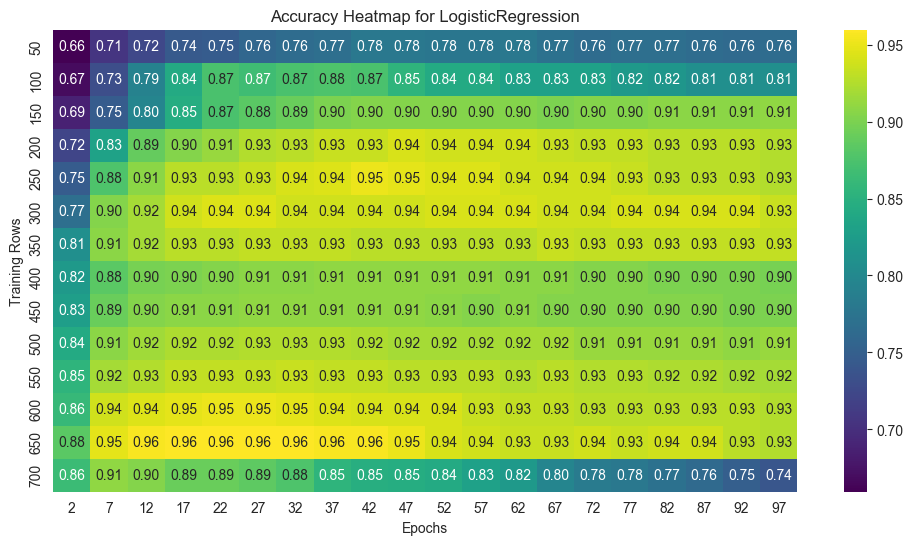

In [ ]:
# Insert your code below
# ======================

model_names = ["Perceptron", "Adaline", "LogisticRegression"]
epoch_values = [2 + 5 * j for j in range(20)]  
row_values = [50 + 50 * i for i in range(14)] 
accuracy_data = accuracy_matrix[model_idx]

for model_idx, model_name in enumerate(model_names):
    plt.figure(figsize=(12, 6))
    
    accuracy_data = accuracy_matrix[model_idx]  # Shape (14, 20)
    sns.heatmap(accuracy_data, annot=True, fmt=".2f", xticklabels=epoch_values, yticklabels=row_values, cmap="viridis")

    plt.xlabel("Epochs")
    plt.ylabel("Training Rows")
    plt.title(f"Accuracy Heatmap for {model_name}")
    plt.show()

# Part V: Some more plotting

For the following cell to execute you need to have the variable `X_test_scaled` with all samples of the test set and the variable `y_test` with the corresponding labels.
Complete at least up until Part III. Executing the cell will plot something.

1. Add code comments explaining what the lines are doing
2. What is the purpose of the plot?
3. Describe all components of the subplot and then comment in general on the entire plot. What does it show? What does it not show?

In [ ]:
# Train and a logistic regression model with 300 epochs and learning rate 0.0001
clf = LogisticRegression(eta = 0.0001, epochs = 300, minibatches=1, random_seed=42)
clf.fit(X_test_scaled, y_test)

fig, axes = plt.subplots(8, 8, figsize=(30, 30))
for i in range(0, 8):
    for j in range(0, 8):
        feature_1 = i
        feature_2 = j
        ax = axes[i, j]

        ax.set_xlabel(f"Feature {feature_1}")
        ax.set_ylabel(f"Feature {feature_2}")

        mins = X_test_scaled.min(axis=0)
        maxs = X_test_scaled.max(axis=0)

        x0 = np.linspace(mins[feature_1], maxs[feature_1], 100)
        x1 = np.linspace(mins[feature_2], maxs[feature_2], 100)

        X0, X1 = np.meshgrid(x0, x1)
        X_two_features = np.c_[X0.ravel(), X1.ravel()]
        X_plot = np.zeros(shape=(X_two_features.shape[0], X_test_scaled.shape[1]))

        X_plot[:, feature_1] = X_two_features[:, 0]
        X_plot[:, feature_2] = X_two_features[:, 1]

        y_pred = clf.predict_proba(X_plot)
        Z = y_pred.reshape(X0.shape)

        ax.pcolor(X0, X1, Z)
        ax.contour(X0, X1, Z, levels=[0.5], colors='k')
        ax.scatter(X_test_scaled[y_test == 0, feature_1], X_test_scaled[y_test == 0, feature_2], color="b", marker="^", s=50, facecolors="none")
        ax.scatter(X_test_scaled[y_test == 1, feature_1], X_test_scaled[y_test == 1, feature_2], color="y", marker="o", s=50, facecolors="none")

fig.tight_layout()
plt.show()

KeyError: "None of [Index([173, 132, 197,   9, 104, 119, 256, 158, 226, 312,\n       ...\n        87, 214, 121, 322,  20, 188,  71, 106, 270, 102],\n      dtype='int64', length=323)] are in the [columns]"

## Part VI: Additional discussion

### Part I:
1. What kind of plots did you use to visualize the raw data, and why did you choose these types of plots?

### Part II:
1. What happens if we don't shuffle the training data before training the classifiers like in Part IV?
2. How could you do the same train/test split (Point 1.-4.) using scikit-learn?

### Part IV:
1. How does increasing the dataset size affect the performance of the logistic regression model? Provide a summary of your findings.
2. Describe the relationship between the number of epochs and model accuracy
3. Which classifier is much slower to train and why do you think that is?
4. One classifier shows strong fluctuations in accuracy for different dataset sizes and number of epochs. Which one is it and why do you think this happens?